# LED Bar controller program in Python

This code uses an <code>AxiGPIO</code> class in Pynq and the on()/off() functions for controlling the LED Bar. The LED Bar is toggled in Left and Right directions that are controlled by on board switches SW0 and SW1.

SW0 : Toggles LED Bar in Left
</br>
SW1 : Toggles LED Bar in Right

## System block diagram:
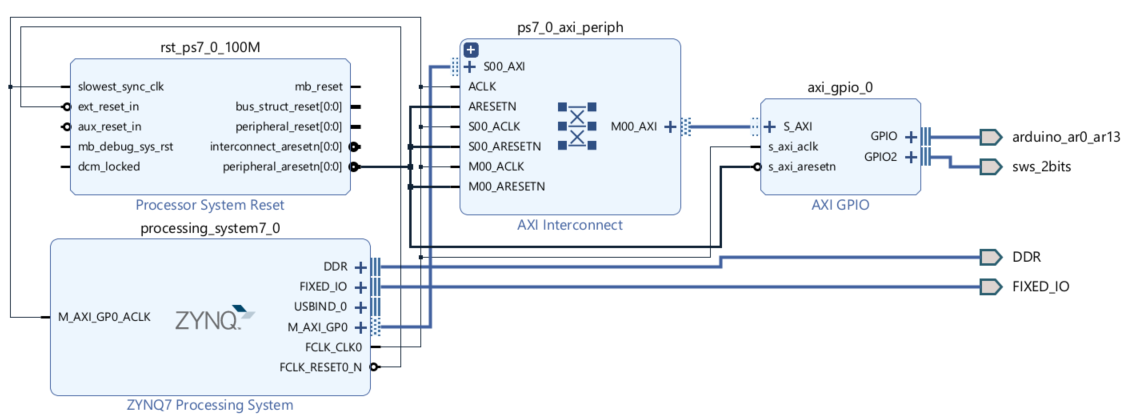

## Loading the Overlay:

An overlay (bitstream) is created for the above system using Vivado. This overlay includes:

<li> Bitstream (LedBarSW.bit) file to configure the FPGA fabric </li>
<li> Vivado design hardware handoff (LedBarSW.hwh) file </li>

</br>
The bitstream and hardware handoff files must be downloaded into Jupyter notebook for installing to the board.
The <code>overlay</code> class in PYNQ is then used to load the overlay. It is then instantiated by specifying the relative path to the bitstream file. 
</br>


In [1]:
# Download the overlay using Pynq Overlay class
# Instantiate the overlay and assign to overlay object 'ol'
from pynq import Overlay
ol = Overlay("./LedBarSW.bit")

## Instantiating AxiGPIO class:

In [2]:
# Import AxiGPIO class
from pynq.lib import AxiGPIO
from time import sleep

The <i>axi_gpio_0</i> block has two channels. LED Bar is wired externally on Arduino IO headers J13 and J14 on the Pynq-Z2 board. These GPIO pins are accessed and assigned to <i>ledBar</i> object. The two on-board switches are accessed through <i>axi_gpio_0</i> channel2 and assigned to objects <i>sW0</i> and <i>sW1</i>.

In [45]:
ledBar = ol.axi_gpio_0.channel1

sW0 = ol.axi_gpio_0.channel2[0]
sW1 = ol.axi_gpio_0.channel2[1]

## Reading Switches:

Using the <code>.read()</code> method, read the value on switches SW0 and SW1. 
</br>
Control the direction of LED Bar in Left direction, when SW0 is enabled.
</br>
Control the direction of LED Bar in Right direction, when SW1 is enabled. 
</br>

In [ ]:
# Read sW0 and left shift LedBar
# Python range() function syntax:
# range(start, stop, step) 
# range(0, 11, 1)
# start value = 0, stop value = 11, step = 1
while (sW0.read() == 1):
    for i in range(0, 11, 1): 
        ledBar[0:i].on()
        sleep(0.10)  # wait for 10ms

    for i in range(0, 11, 1):
        ledBar[0:i].off()
        sleep(0.10) # wait for 10ms

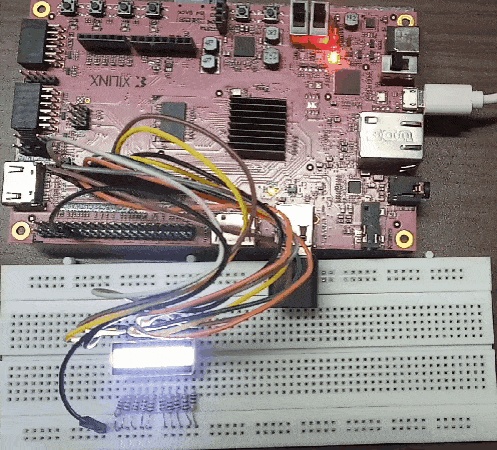

In [ ]:
# Read sW1 and right shift LedBar
# range(11, 0, -1)
# start value = 11, stop value = 0, step = -1
while (sW1.read() == 1):
    for i in range(11, 0, -1):
        ledBar[i].on()
        sleep(0.10)  # wait for 10ms

    for i in range(11, 0, -1):
        ledBar[i].off()
        sleep(0.10) # wait for 10ms

<code>reversed()</code> in Python is a built-in function. This code block uses this in-built reversed function to execute the LED Bar toggle operation in the right direction. 

In [ ]:
# Read sW1 and right shift LedBar
while (sW1.read() == 1):
    for i in reversed(range(11)):
        ledBar[i].on()
        sleep(0.10)  # wait for 10ms

    for i in reversed(range(11)):
        ledBar[i].off()
        sleep(0.10) # wait for 10ms

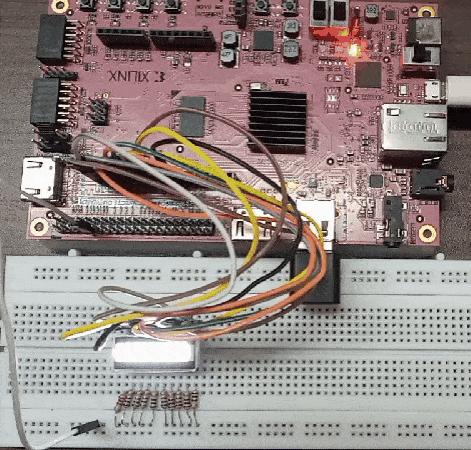